<ipython-input-1-fc0732f0d9e9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reddit_plot[year] = df_reddit.loc[:,df_reddit.columns.str.contains(year)].sum(axis = 1).tolist()
<ipython-input-1-fc0732f0d9e9>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reddit_plot[year] = df_reddit.loc[:,df_reddit.columns.str.contains('|'.join(reddit_year_list[:-1]))].sum(axis = 1).tolist()
<ipython-input-1-fc0732f0d9e9>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

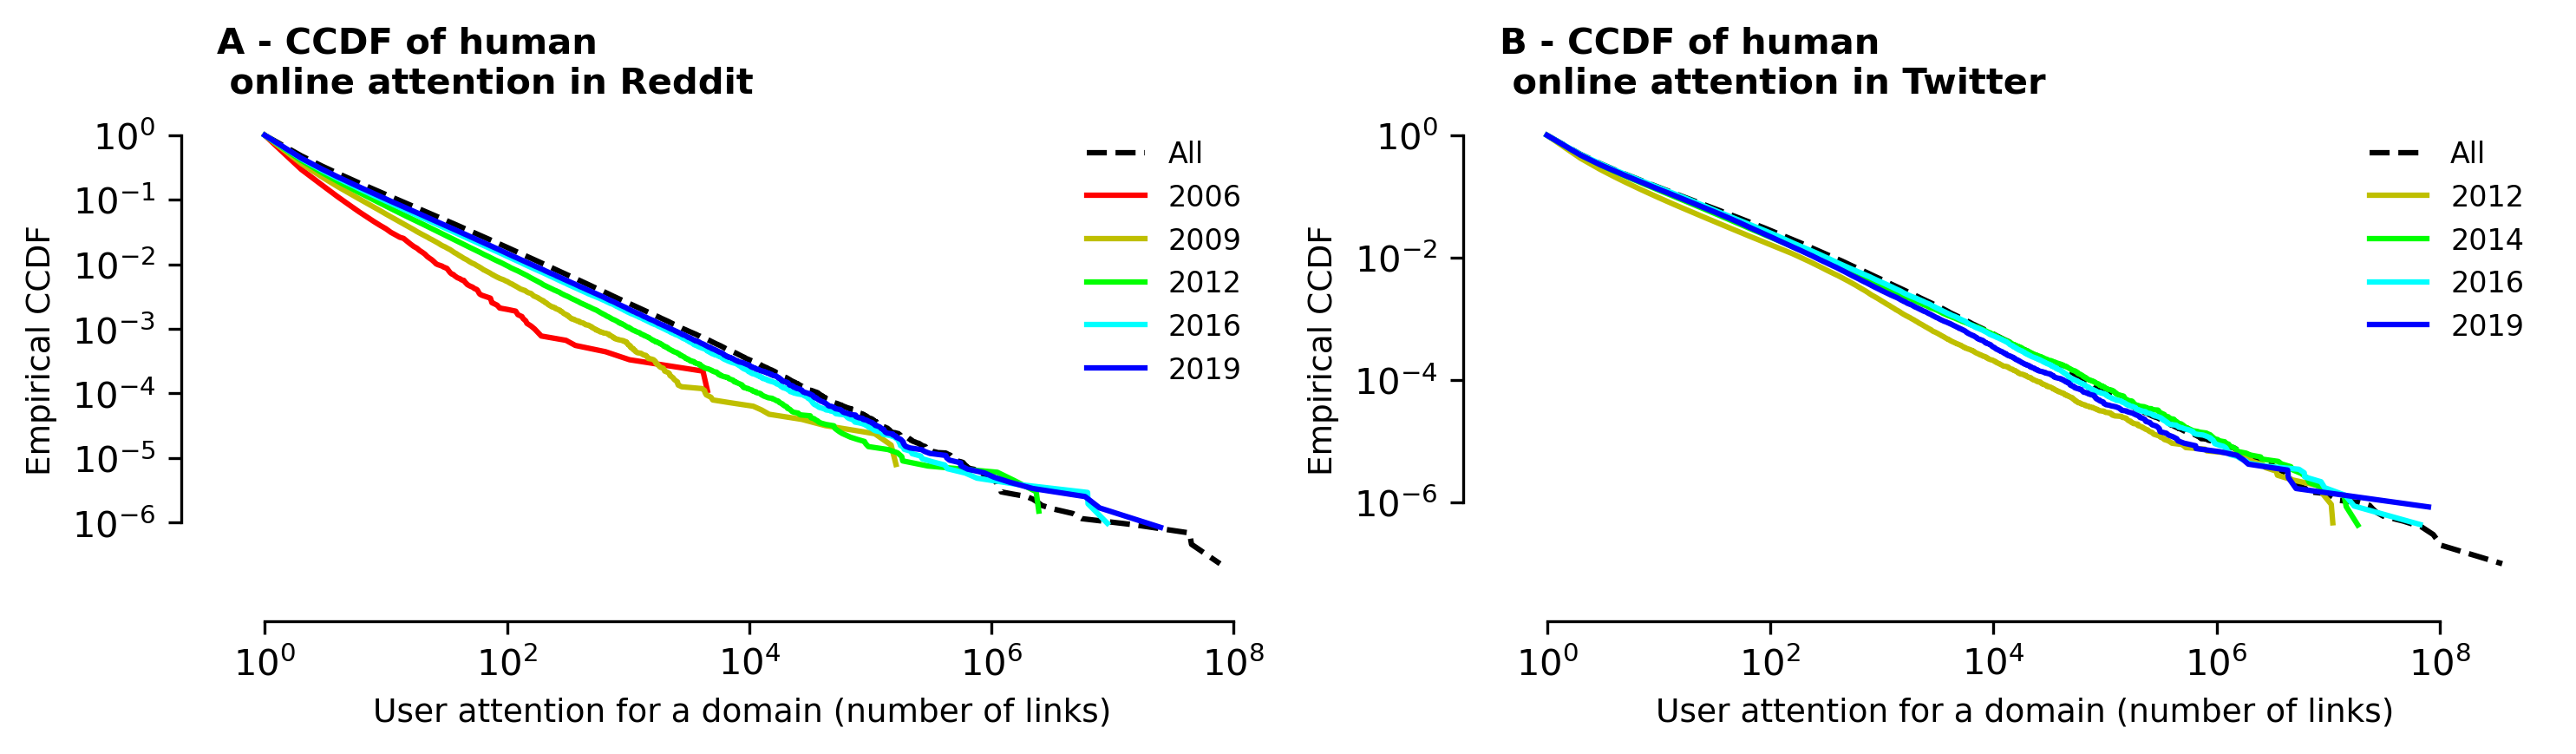

In [1]:
# Load Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import powerlaw

%matplotlib inline
plt.rcParams['figure.dpi'] = 300

# Load Reddit Data
df_reddit = pd.read_csv('../data/reddit.csv.xz')
df_reddit_plot = df_reddit[['Domain']]
df_reddit.set_index('Domain', inplace = True)

reddit_year_list = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019', 'All']
top10_list = []
top50_list = []
top100_list = []
top500_list = []
top1000_list = []
for year in reddit_year_list:
    if year != 'All':
        df_reddit_plot[year] = df_reddit.loc[:,df_reddit.columns.str.contains(year)].sum(axis = 1).tolist()
        top10_list.append(df_reddit_plot[year].sort_values(ascending = False).head(10).sum()/df_reddit_plot[year].sum())
        top50_list.append(df_reddit_plot[year].sort_values(ascending = False).head(50).sum()/df_reddit_plot[year].sum())
        top100_list.append(df_reddit_plot[year].sort_values(ascending = False).head(100).sum()/df_reddit_plot[year].sum())
        top500_list.append(df_reddit_plot[year].sort_values(ascending = False).head(500).sum()/df_reddit_plot[year].sum())
        top1000_list.append(df_reddit_plot[year].sort_values(ascending = False).head(1000).sum()/df_reddit_plot[year].sum())
    else:
        df_reddit_plot[year] = df_reddit.loc[:,df_reddit.columns.str.contains('|'.join(reddit_year_list[:-1]))].sum(axis = 1).tolist()
        
df_reddit_top_percent_trend = pd.DataFrame([reddit_year_list[:-1],top10_list,top50_list,top100_list, top500_list, top1000_list]).transpose()
df_reddit_top_percent_trend.columns = ['Year','top10','top50','top100','top500','top1000']
df_reddit_top_percent_trend.set_index('Year', inplace = True)
df_reddit_top_percent_trend = df_reddit_top_percent_trend.apply(pd.to_numeric)

# Load Twitter Data
df_twitter1 = pd.read_csv('../data/twitter.csv.1.xz')
df_twitter2 = pd.read_csv('../data/twitter.csv.2.xz')
df_twitter = pd.concat([df_twitter1, df_twitter2], axis = 0)
df_twitter_plot = df_twitter[['Domain']]
df_twitter.set_index('Domain', inplace = True)

twitter_year_list = ['2011','2012','2013','2014','2015','2016','2017','2018','2019', 'All']
top10_list = []
top50_list = []
top100_list = []
top500_list = []
top1000_list = []
for year in twitter_year_list:
    if year != 'All':
        df_twitter_plot[year] = df_twitter.loc[:,df_twitter.columns.str.contains(year)].sum(axis = 1).tolist()
        top10_list.append(df_twitter_plot[year].sort_values(ascending = False).head(10).sum()/df_twitter_plot[year].sum())
        top50_list.append(df_twitter_plot[year].sort_values(ascending = False).head(50).sum()/df_twitter_plot[year].sum())
        top100_list.append(df_twitter_plot[year].sort_values(ascending = False).head(100).sum()/df_twitter_plot[year].sum())
        top500_list.append(df_twitter_plot[year].sort_values(ascending = False).head(500).sum()/df_twitter_plot[year].sum())
        top1000_list.append(df_twitter_plot[year].sort_values(ascending = False).head(1000).sum()/df_twitter_plot[year].sum())
    else:
        df_twitter_plot[year] = df_twitter.loc[:,df_twitter.columns.str.contains('|'.join(twitter_year_list[:-1]))].sum(axis = 1).tolist()
        

df_twitter_top_percent_trend = pd.DataFrame([twitter_year_list[:-1],top10_list,top50_list,top100_list, top500_list, top1000_list]).transpose()
df_twitter_top_percent_trend.columns = ['Year','top10','top50','top100','top500','top1000']
df_twitter_top_percent_trend.set_index('Year', inplace = True)
df_twitter_top_percent_trend = df_twitter_top_percent_trend.apply(pd.to_numeric)

# Fig3 in paper
fig_ccdf, (ax4, ax5) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

powerlaw.plot_ccdf(df_reddit_plot['All'][df_reddit_plot['All']>0], color = 'k', label = 'All', linestyle = 'dashed', ax = ax4)
powerlaw.plot_ccdf(df_reddit_plot['2006'][df_reddit_plot['2006']>0], color = 'r', label = '2006', ax = ax4)
powerlaw.plot_ccdf(df_reddit_plot['2009'][df_reddit_plot['2009']>0], color = 'y', label = '2009', ax = ax4)
powerlaw.plot_ccdf(df_reddit_plot['2012'][df_reddit_plot['2012']>0], color = 'lime', label = '2012', ax = ax4)
powerlaw.plot_ccdf(df_reddit_plot['2016'][df_reddit_plot['2016']>0], color = 'cyan', label = '2016', ax = ax4)
powerlaw.plot_ccdf(df_reddit_plot['2019'][df_reddit_plot['2019']>0], color = 'b', label = '2019', ax = ax4)
ax4.set_xticks([1e+00, 1e+02, 1e+04, 1e+06, 1e+08])
ax4.set_xlabel('User attention for a domain (number of links)', fontdict = {'fontsize': 9})
ax4.set_ylabel('Empirical CCDF', fontdict = {'fontsize': 9})
ax4.set_title('A - CCDF of human \n online attention in Reddit' , loc = 'left', 
              fontdict = {'fontsize': 10, 'fontweight': 'bold', 'horizontalalignment': 'left'})
sns.despine(offset=10, trim=True, ax = ax4)
legend4 = ax4.legend(prop={'size': 8})
frame4 = legend4.get_frame()
frame4.set_facecolor('white')
frame4.set_edgecolor('white')

powerlaw.plot_ccdf(df_twitter_plot['All'][df_twitter_plot['All']>0], color = 'k', label = 'All', linestyle = 'dashed', ax = ax5)
powerlaw.plot_ccdf(df_twitter_plot['2012'][df_twitter_plot['2012']>0], color = 'y', label = '2012', ax = ax5)
powerlaw.plot_ccdf(df_twitter_plot['2014'][df_twitter_plot['2014']>0], color = 'lime', label = '2014', ax = ax5)
powerlaw.plot_ccdf(df_twitter_plot['2016'][df_twitter_plot['2016']>0], color = 'cyan', label = '2016', ax = ax5)
powerlaw.plot_ccdf(df_twitter_plot['2019'][df_twitter_plot['2019']>0], color = 'b', label = '2019', ax = ax5)
ax5.set_xticks([1e+00, 1e+02, 1e+04, 1e+06, 1e+08])
ax5.set_xlabel('User attention for a domain (number of links)', fontdict = {'fontsize': 9})
ax5.set_ylabel('Empirical CCDF', fontdict = {'fontsize': 9})
ax5.set_title('B - CCDF of human \n online attention in Twitter' , loc = 'left', 
              fontdict = {'fontsize': 10, 'fontweight': 'bold', 'horizontalalignment': 'left'})
sns.despine(offset=10, trim=True, ax = ax5)
legend5 = ax5.legend(prop={'size': 8})
frame5 = legend5.get_frame()
frame5.set_facecolor('white')
frame5.set_edgecolor('white')

plt.tight_layout()
fig_ccdf.savefig('../plots/Fig4.pdf')
fig_ccdf.show()